In [1]:
from google.colab import files
uploaded = files.upload()

Saving Final_Dataset_V2.xlsx to Final_Dataset_V2.xlsx


In [47]:
del df

In [48]:
import pandas as pd
# Load data
df = pd.read_excel('Final_Dataset_V2.xlsx', sheet_name='Sheet1')

In [49]:
foul_words = ['fuck', 'suck', 'ass']

def filter_foul_words(text):
    words = str(text).split()  # Convert input value to a string before calling split()
    filtered_words = [word for word in words if not any(foul_word.lower() in word.lower() for foul_word in foul_words)]
    return ' '.join(filtered_words)

def remove_links(text):
    return re.sub(r'https?\S+', '', text)

In [50]:
import pandas as pd
import re
import html
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

#nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
# Define the target variable
y = df['rating']

# Define the feature variable
X = df['review']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.fillna('', inplace=True)
X_test.fillna('', inplace=True)

def preprocess_text(text):
    # Convert to string if input is not a string
    if not isinstance(text, str):
        text = str(text)

    # Remove Original Keywords
    text = text.split("(Original)")[0].rstrip("(").rstrip()

    # Remove Translated by Google
    text = re.sub(r'\(Translated by Google\)', '', text)

    # Decode HTML tags
    text = html.unescape(text)

    # Remove Foul words
    text = re.sub(r'\b(fuck|fucked|fucking|shit|shitty)\b', '', text, flags=re.IGNORECASE)

    # Remove HTTPS
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)

    # Remove URL
    url_pattern = re.compile(r'(https?://|www\.)\S+')
    text = url_pattern.sub('', text)

    # Remove // & # characters
    text = text.replace('//', '').replace('#', '')

    # Replace **** with BAD
    text = re.sub(r'\*+', 'BAD', text)

    return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [55]:
# Create the pipeline
lr_tfidf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), stop_words=None)),
    ('lr', LogisticRegression())
])

# Apply the preprocessing function to the training data
X_train = X_train.apply(preprocess_text)

# Apply the preprocessing function to the testing data
X_test = X_test.apply(preprocess_text)

# Train the model
lr_tfidf_pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr_tfidf_pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5616666666666666


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
accuracy

0.5616666666666666

In [11]:
print(y_train.value_counts())

3    2426
5    2408
4    2401
1    2401
2    2364
Name: rating, dtype: int64


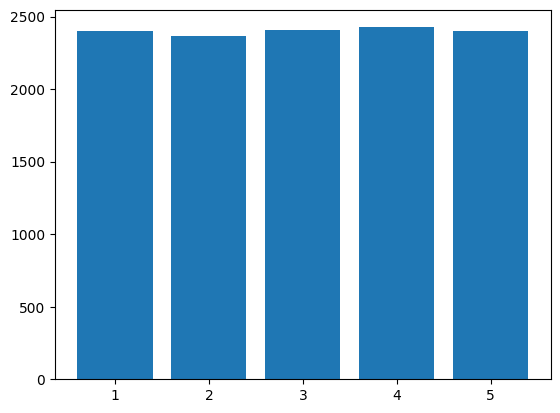

In [12]:
import matplotlib.pyplot as plt

plt.bar(y_train.unique(), y_train.value_counts())
plt.show()